# Pair Programming Limpieza III

In [1]:
import pandas as pd
pd.options.display.max_columns = None
import re
import sidetable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("../datos/datos_limpiezaII.csv")
df.head()

,year,country,age,species,date,month,fatal,sex,main_species,age_numbers
0,2018,usa,57,White shark,25-Jun-2018,Jun,n,F,white_shark,57.0
1,2018,brazil,18,Tiger shark,03-Jun-2018,Jun,y,M,tiger_shark,18.0
2,2018,usa,15,"Bull shark, 6'",26-May-2018,May,n,M,bull_shark,15.0
3,2018,australia,32,Grey reef shark,24-May-2018,May,n,M,grey_shark,32.0
4,2018,england,21,Invalid incident,13-May-2018,May,n,M,unspecified,21.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1666 non-null   int64  
 1   country       1656 non-null   object 
 2   age           1518 non-null   object 
 3   species       1545 non-null   object 
 4   date          1666 non-null   object 
 5   month         1617 non-null   object 
 6   fatal         1569 non-null   object 
 7   sex           1652 non-null   object 
 8   main_species  1666 non-null   object 
 9   age_numbers   1514 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 130.3+ KB


In [15]:
#tenemos 2 columnas en la que podemos trabajar los outliers
df_numericas = df.select_dtypes(include=np.number)

Identifica visualmente los outliers

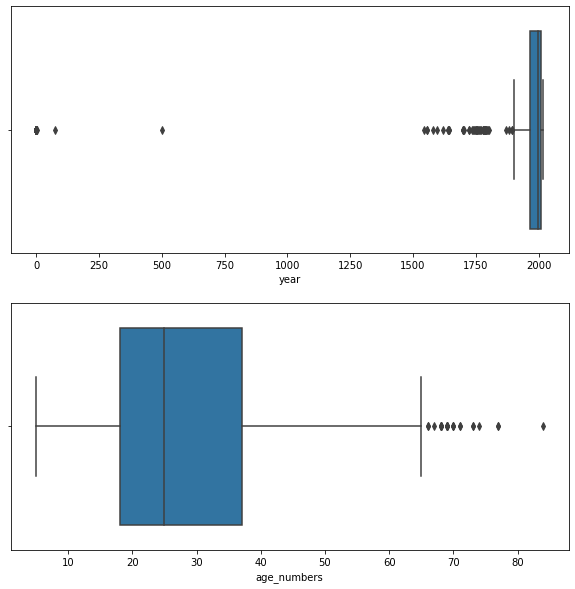

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

Identifica sobre el dataframe las filas que son outliers

In [33]:
def detectar_outliers(columnas, dataframe): 
    
    dicc_indices = {}

    for col in columnas :
    
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)

        IQR = Q3 - Q1

        outlier_1_5 = 1.5 * IQR

        outliers = df[(df[col] < Q1 - outlier_1_5) | (df[col] > Q3 + outlier_1_5)]
        
        if outliers.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers.index))
            
    return dicc_indices 

In [34]:
columnas_numericas = list(df_numericas.columns)
columnas_numericas

['year', 'age_numbers']

In [41]:
indices = detectar_outliers(columnas_numericas, df)

In [57]:
# con lo siguiente vamos a iterar entre los indices que tenemos arriba, calcularemos la media de estos valores.
#y los vamos a remplazar.
for keys, values in indices.items():
    media = round(df[keys].mean(),1) # pongo el round para que salga un numero sin demasiados decimales(pero dejo uno para que sepa cual son en caso que en futuro querramos cambairlos)
    for x in values: 
        df.loc[x,keys] = media 

In [58]:
#aqui podemos identificar facilmente la media al ser 27.9.
df["age_numbers"].unique()

array([57. , 18. , 15. , 32. , 21. , 30. , 60. , 33. , 19. , 25. , 10. ,
       27.9, 55. , 35. , 20. , 54. , 22. , 31. , 40. , 37. , 11. , 13. ,
       34. , 50. , 46. , 48. , 17. , 28. , 65. , 58. , 36. , 51. , 61. ,
       59. , 42. ,  6. , 27. , 23. , 29. , 39. , 24. , 12. , 26. , 43. ,
        9. , 44. , 14. , 62. , 52. , 38. , 16. , 47. , 63. , 41. , 53. ,
        7. , 45. , 64. ,  8. , 56. , 49. ,  nan,  5. ])

3. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza

In [59]:
df.to_csv("../datos/datos_limpiezaIII.csv", index = False)